In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# global parameters

L = 20  # side length
N = L ** 2  # number of sites
q = 6  # number of states per site
J = 1  # ferromagnetic interaction strength

## Function Definitions

In [3]:
def energy_nn(sigma, J):
    en = 0
    for i in range(L):
        for j in range(L):
            if sigma[i, j] == sigma[i, (j + 1) % L]: en -= J
            if sigma[i, j] == sigma[(i + 1) % L, j]: en -= J
    return en


def delta_energy_nn(sigma, J, ind, new_q):
    i, j = ind
    neighs = [(i, (j + 1) % L), (i, (j - 1) % L), ((i + 1) % L, j), ((i - 1) % L, j)]
    delta_en = 0
    for x, y in neighs:
        if sigma[i, j] == sigma[x, y]:
            delta_en += J
        if new_q == sigma[x, y]:
            delta_en -= J
    return delta_en


def propose_flip(sigma, J):
    index = np.random.randint(0, N)
    index = index // L, index % L
    x = np.random.randint(0, q)
    while x == sigma[index]:
        x = np.random.randint(0, q)
    return index, x


# metropolis acceptance with symmetric proposal. returns a Boolean
def metropolis(delta_en, t):
    if delta_en < 0:
        return True
    if np.random.uniform(0, 1) < np.exp(- delta_en / t):
        return True
    return False

In [4]:
# metropolis simulation. Accept parameters specifying system and simulation config. Store results in global dicts.

def MCMC(L, q, t, nstep, burnin, J=1):
    np.random.seed(42)

    # random initial configuration
    sigma = np.random.randint(0, q, (L, L))
    en = energy_nn(sigma, J)

    # run a few steps to reach stationarity
    for istep in range(burnin):
        # propose random flip
        ind, q_new = propose_flip(sigma, J)
        # compute energy difference
        delta_en = delta_energy_nn(sigma, J, ind, q_new)
        # metropolis update rule
        if metropolis(delta_en, t):
            # update state
            q_old = sigma[ind]
            sigma[ind] = q_new
            # update energy
            en += delta_en

    # prepare to store metrics
    mag_history[t] = np.zeros((q, nstep + 1))
    mag_history[t][:, 0] = np.bincount(sigma.reshape(-1), minlength=q)
    prob_history[t] = []
    en_history[t] = []
    n_accepted[t] = 0

    # main loop
    for istep in range(nstep):
        # propose random flip
        ind, q_new = propose_flip(sigma, J)
        # compute energy difference
        delta_en = delta_energy_nn(sigma, J, ind, q_new)
        # update probability history
        if delta_en > 0:
            prob_history[t].append(np.exp(- delta_en / t))
        else:
            prob_history[t].append(1)
        # prepare magnetization update
        mag_history[t][:, istep + 1] = mag_history[t][:, istep]
        # metropolis update rule
        if metropolis(delta_en, t):
            # update state
            q_old = sigma[ind]
            sigma[ind] = q_new
            n_accepted[t] += 1
            # update energy
            en += delta_en
            # update magnetization history
            mag_history[t][q_old, istep + 1] -= 1
            mag_history[t][q_new, istep + 1] += 1
        # update energy history
        en_history[t].append(en)

    en_history[t] = np.array(en_history[t])
    prob_history[t] = np.array(prob_history[t])

## Interactive Simulation

In [49]:
# Monte Carlo simulation

# random initial configuration
sigma = np.random.randint(0, q, (L, L))  # change

t = 0.9
nstep = 1000000
stride = 1000

en = energy_nn(sigma, J)

en_history = []
mag_history = np.zeros((q, nstep + 1))
prob_history = []
n_accepted = 0
mag_history[:, 0] = np.bincount(sigma.reshape(-1), minlength=q)  # change

for istep in range(nstep):

    # propose random flip
    ind, q_new = propose_flip(sigma, J)
    # compute energy difference
    delta_en = delta_energy_nn(sigma, J, ind, q_new)

    # update probability history
    if delta_en > 0:
        prob_history.append(np.exp(- delta_en / t))
    else:
        prob_history.append(1)

    # prepare magnetization update
    mag_history[:, istep + 1] = mag_history[:, istep]

    # metropolis update rule
    if metropolis(delta_en, t):
        # update state
        q_old = sigma[ind]
        sigma[ind] = q_new
        n_accepted += 1

        # update energy
        en += delta_en
        # update magnetization history
        mag_history[q_old, istep + 1] -= 1
        mag_history[q_new, istep + 1] += 1

    # update energy history
    en_history.append(en)

    if istep % stride == 0:
        print(istep, en)

en_history = np.array(en_history)
prob_history = np.array(prob_history)

0 -146
1000 -277
2000 -314
3000 -337
4000 -329
5000 -332
6000 -346
7000 -335
8000 -358
9000 -355
10000 -336
11000 -337
12000 -365
13000 -356
14000 -345
15000 -336
16000 -386
17000 -376
18000 -405
19000 -387
20000 -392
21000 -384
22000 -366
23000 -375
24000 -403
25000 -404
26000 -397
27000 -351
28000 -349
29000 -340
30000 -388
31000 -375
32000 -371
33000 -354
34000 -375
35000 -375
36000 -360
37000 -369
38000 -377
39000 -392
40000 -357
41000 -363
42000 -362
43000 -334
44000 -355
45000 -350
46000 -359
47000 -353
48000 -351
49000 -356
50000 -380
51000 -356
52000 -341
53000 -359
54000 -388
55000 -379
56000 -369
57000 -367
58000 -332
59000 -314
60000 -356
61000 -358
62000 -362
63000 -373
64000 -362
65000 -358
66000 -342
67000 -352
68000 -351
69000 -347
70000 -347
71000 -370
72000 -360
73000 -359
74000 -334
75000 -330
76000 -350
77000 -367
78000 -336
79000 -347
80000 -364
81000 -358
82000 -345
83000 -352
84000 -370
85000 -355
86000 -340
87000 -338
88000 -352
89000 -320
90000 -323
91000 -346
9

In [50]:
burnin = 0
en_history_full = en_history
mag_history_full = mag_history
en_history = en_history[burnin:]
mag_history = mag_history[:, burnin:]

Average energy: -362.296688


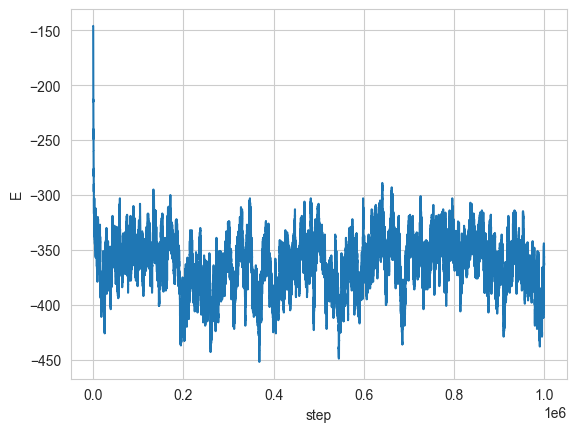

In [51]:
plt.plot(en_history)
plt.xlabel("step")
plt.ylabel("E")
print(f'Average energy: {en_history.mean()}')
plt.show()

Fraction of accepted proposals: 0.392463


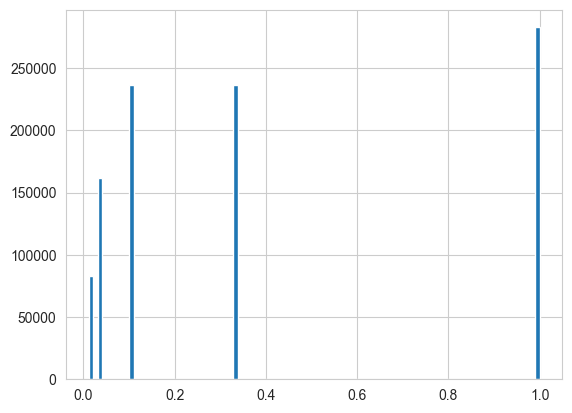

In [52]:
print(f"Fraction of accepted proposals: {n_accepted / nstep}")
plt.hist(prob_history, bins=100)
plt.show()

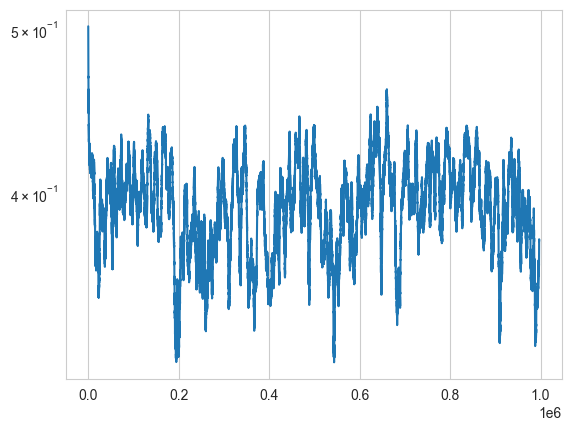

In [53]:
# convolve acceptance probabilities with a kernel to improve visualization
window_size = 3000
kernel = np.ones(window_size) / window_size
smoothed_probs = np.convolve(prob_history, kernel, mode='valid')

# plot
plt.plot(smoothed_probs)
plt.yscale('log')
plt.show()

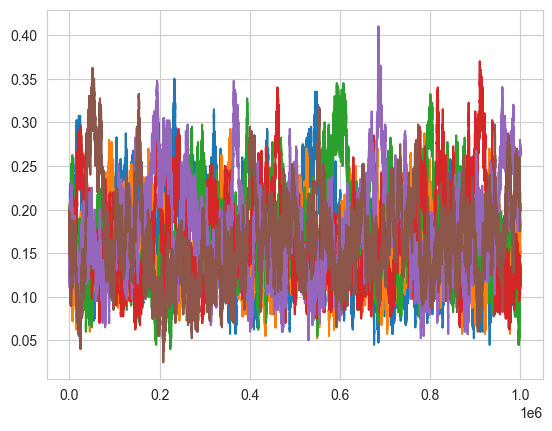

In [54]:
# print magnetization evolution in time
for i in range(q):
    plt.plot(mag_history[i] / N, label=i)
plt.show()

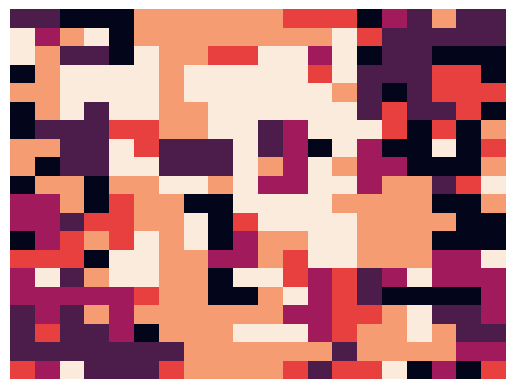

In [55]:
sns.heatmap(sigma.reshape(L, L), cbar=False, xticklabels=False, yticklabels=False)
plt.show()

## Test MCMC

In [6]:
en_history = {}
mag_history = {}
prob_history = {}
n_accepted = {}

L = 20
q = 6
t = 0.7
nstep = 1000000
burnin = 300000
J = 1

MCMC(L=L, q=q, t=t, nstep=nstep, burnin=burnin, J=J)

KeyboardInterrupt: 

Average energy: -757.775922


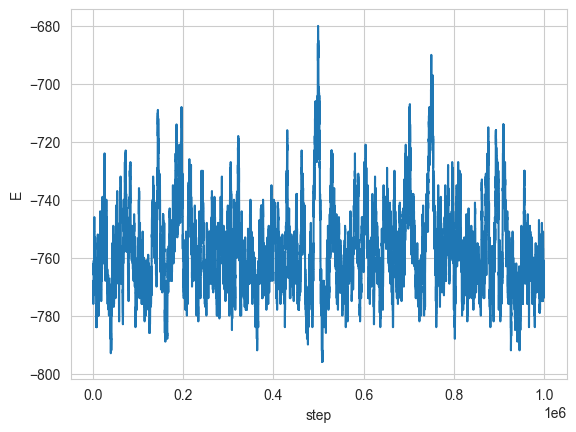

In [22]:
plt.plot(en_history[t])
plt.xlabel("step")
plt.ylabel("E")
print(f'Average energy: {en_history[t].mean()}')
plt.show()

Fraction of accepted proposals: 0.030947


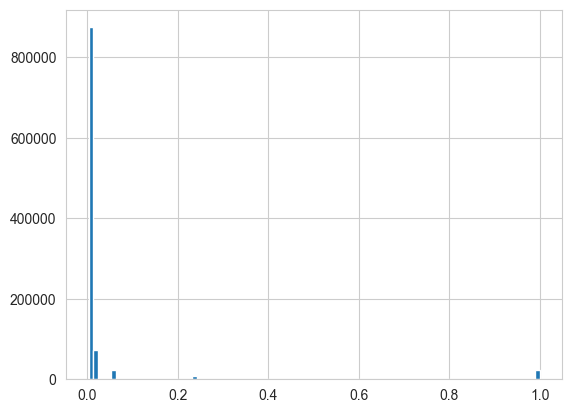

In [23]:
print(f"Fraction of accepted proposals: {n_accepted[t] / nstep}")
plt.hist(prob_history[t], bins=100)
plt.show()

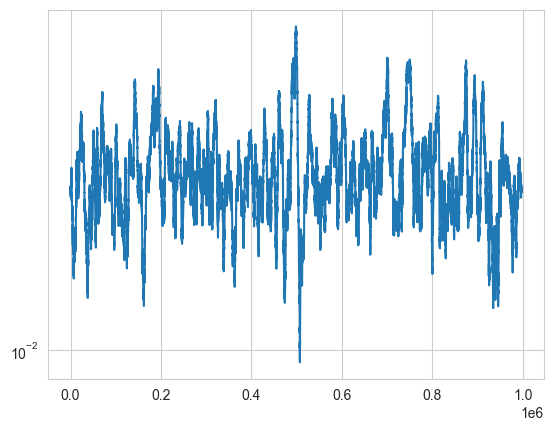

In [24]:
# convolve acceptance probabilities with a kernel to improve visualization
window_size = 3000
kernel = np.ones(window_size) / window_size
smoothed_probs = np.convolve(prob_history[t], kernel, mode='valid')

# plot
plt.plot(smoothed_probs)
plt.yscale('log')
plt.show()

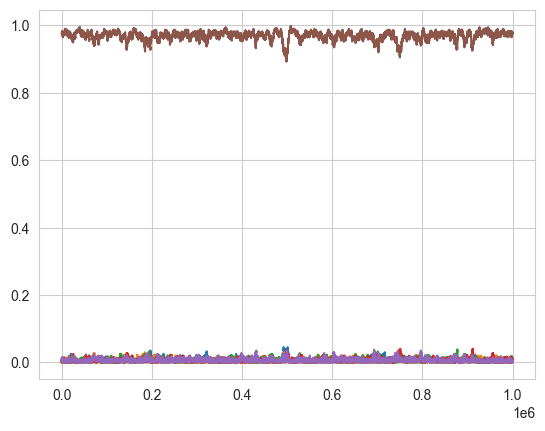

In [25]:
# print magnetization evolution in time
for i in range(q):
    plt.plot(mag_history[t][i] / N, label=i)
plt.show()

## Simulations

In [10]:
import time

en_history = {}
mag_history = {}
prob_history = {}
n_accepted = {}

L = 20
q = 6
J = 1

burnin = 500000
nstep = 3 * 10 ** 6

temps = [0.1, 0.3, 0.7, 0.75, 0.79, 0.8, 0.81, 0.82, 0.85, 0.9, 1.2, 1.5, 2.0, 5.0]

tempo = time.time()
for t in temps:
    print(f'temperature: {t}')
    MCMC(L, q, t, nstep, burnin, J)  # seed 42
    print(f"Passed: {time.time() - tempo}")

temperature: 0.1
Passed: 9.699533700942993
temperature: 0.3
Passed: 19.192846059799194
temperature: 0.7


KeyboardInterrupt: 

In [105]:
avgs = [en_history[t].mean() for t in temps]

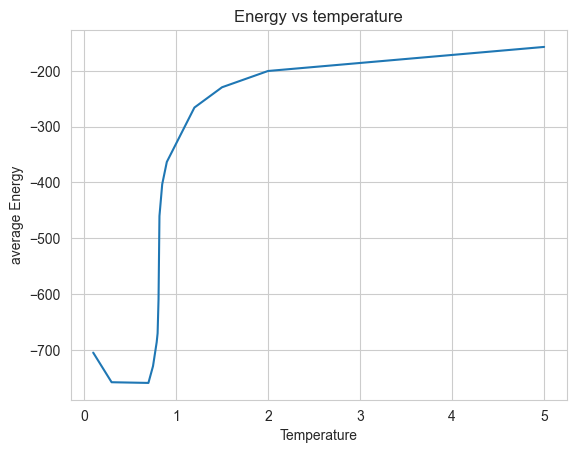

In [106]:
plt.plot(temps, avgs)
plt.xlabel('Temperature')
plt.ylabel('average Energy')
plt.title('Energy vs temperature')
plt.show()

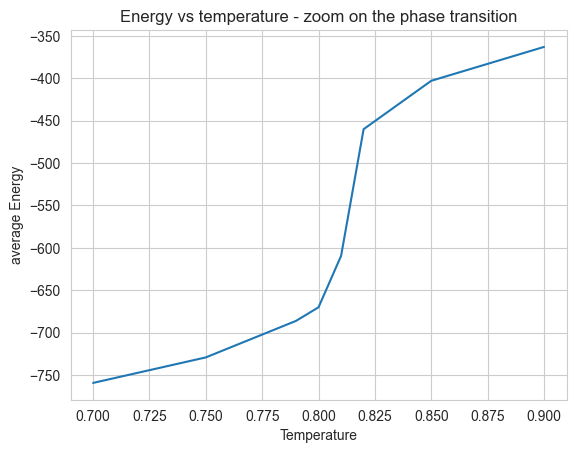

In [107]:
plt.plot(temps[2:-4], avgs[2:-4])
plt.xlabel('Temperature')
plt.ylabel('average Energy')
plt.title('Energy vs temperature - zoom on the phase transition')
plt.show()

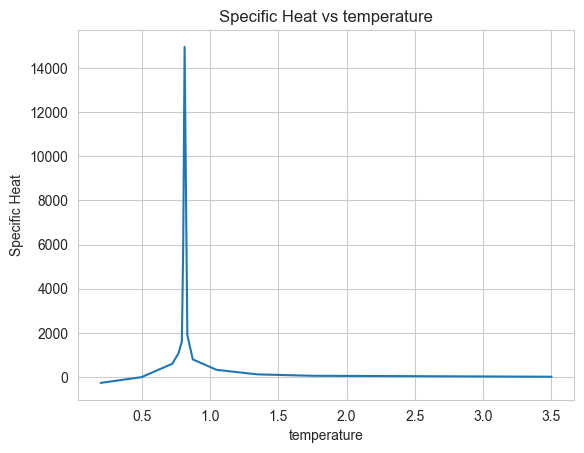

In [110]:
spec_heats = [(avgs[i + 1] - avgs[i]) / (temps[i + 1] - temps[i]) for i in range(0, len(temps) - 1)]
avg_temps = [(temps[i + 1] + temps[i]) / 2 for i in range(0, len(temps) - 1)]

plt.plot(avg_temps, spec_heats)
plt.ylabel('Specific Heat')
plt.xlabel('temperature')
plt.title('Specific Heat vs temperature')
plt.show()

In [137]:
t = 0.85

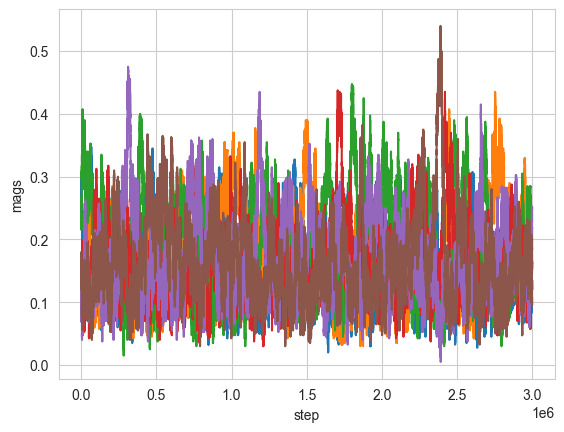

In [138]:
# print magnetization evolution in time
for i in range(q):
    plt.plot(mag_history[t][i] / N, label=i)
plt.xlabel('step')
plt.ylabel('mags')
plt.show()

Average energy: -403.1276046666667


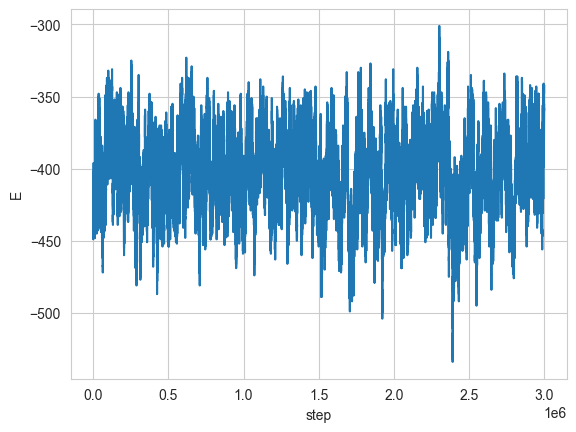

In [139]:
plt.plot(en_history[t])
plt.xlabel("step")
plt.ylabel("E")

print(f'Average energy: {en_history[t].mean()}')
plt.show()

Fraction of accepted proposals: 0.3353176666666667


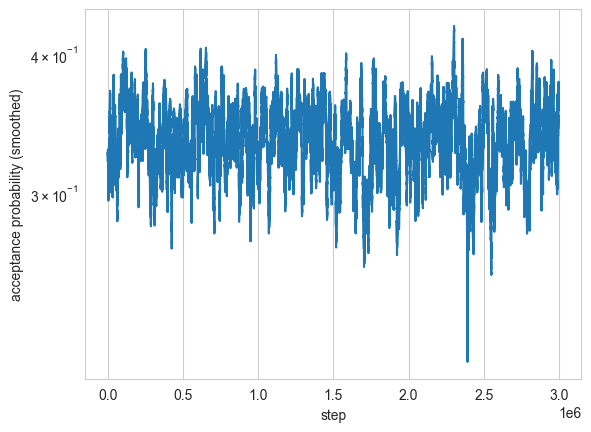

In [140]:
# convolve acceptance probabilities with a kernel to improve visualization
window_size = 3000
kernel = np.ones(window_size) / window_size
smoothed_probs = np.convolve(prob_history[t], kernel, mode='valid')

# plot
plt.plot(smoothed_probs)
plt.xlabel('step')
plt.ylabel('acceptance probability (smoothed)')
plt.yscale('log')

print(f"Fraction of accepted proposals: {n_accepted[t] / nstep}")
plt.show()